## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.859838  1.431898 -1.029628  0.920364 -0.561512  0.833047
1  0.125629  0.643285  1.639776  1.049024 -1.218573  1.633521
2  1.305992 -0.567255  0.919330 -1.490854 -1.039175 -0.840445
3  0.728619 -0.795697 -0.646398 -0.350502  0.552498 -0.136798
4 -0.621263 -1.047685 -0.072179  0.835061  0.015406 -0.543165


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9887030	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9799876	total: 70.1ms	remaining: 35s
2:	learn: 0.9713699	total: 71.5ms	remaining: 23.7s
3:	learn: 0.9601952	total: 71.9ms	remaining: 17.9s
4:	learn: 0.9489907	total: 72.5ms	remaining: 14.4s
5:	learn: 0.9390027	total: 73ms	remaining: 12.1s
6:	learn: 0.9292636	total: 73.5ms	remaining: 10.4s
7:	learn: 0.9209932	total: 74ms	remaining: 9.17s
8:	learn: 0.9124549	total: 74.4ms	remaining: 8.19s
9:	learn: 0.9034948	total: 74.9ms	remaining: 7.42s
10:	learn: 0.8965936	total: 75.4ms	remaining: 6.78s
11:	learn: 0.8870225	total: 76ms	remaining: 6.25s
12:	learn: 0.8776832	total: 76.6ms	remaining: 5.81s
13:	learn: 0.8699314	total: 77.1ms	remaining: 5.43s
14:	learn: 0.8633728	total: 77.7ms	remaining: 5.1s
15:	learn: 0.8548460	total: 78.1ms	remaining: 4.8s
16:	learn: 0.8467973	total: 78.6ms	remaining: 4.55s
17:	learn: 0.8387448	total: 79ms	remaining: 4.31s
18:	learn: 0.8304457	total: 79.6ms	remaining: 4.11s
19:	

83:	learn: 0.4727845	total: 109ms	remaining: 1.19s
84:	learn: 0.4688336	total: 110ms	remaining: 1.18s
85:	learn: 0.4653454	total: 110ms	remaining: 1.17s
86:	learn: 0.4623345	total: 110ms	remaining: 1.16s
87:	learn: 0.4586377	total: 111ms	remaining: 1.15s
88:	learn: 0.4553483	total: 111ms	remaining: 1.14s
89:	learn: 0.4516775	total: 112ms	remaining: 1.13s
90:	learn: 0.4485812	total: 112ms	remaining: 1.12s
91:	learn: 0.4446209	total: 112ms	remaining: 1.11s
92:	learn: 0.4414699	total: 113ms	remaining: 1.1s
93:	learn: 0.4376546	total: 113ms	remaining: 1.09s
94:	learn: 0.4346462	total: 114ms	remaining: 1.08s
95:	learn: 0.4314330	total: 114ms	remaining: 1.07s
96:	learn: 0.4284430	total: 115ms	remaining: 1.07s
97:	learn: 0.4257912	total: 115ms	remaining: 1.06s
98:	learn: 0.4229427	total: 115ms	remaining: 1.05s
99:	learn: 0.4197432	total: 116ms	remaining: 1.04s
100:	learn: 0.4171167	total: 116ms	remaining: 1.04s
101:	learn: 0.4139186	total: 117ms	remaining: 1.03s
102:	learn: 0.4109470	total: 1

253:	learn: 0.1588232	total: 188ms	remaining: 552ms
254:	learn: 0.1577363	total: 188ms	remaining: 550ms
255:	learn: 0.1568338	total: 189ms	remaining: 549ms
256:	learn: 0.1557000	total: 189ms	remaining: 547ms
257:	learn: 0.1548311	total: 190ms	remaining: 546ms
258:	learn: 0.1540672	total: 190ms	remaining: 544ms
259:	learn: 0.1531652	total: 191ms	remaining: 544ms
260:	learn: 0.1525474	total: 192ms	remaining: 542ms
261:	learn: 0.1517221	total: 192ms	remaining: 541ms
262:	learn: 0.1508991	total: 192ms	remaining: 539ms
263:	learn: 0.1500589	total: 193ms	remaining: 538ms
264:	learn: 0.1492842	total: 193ms	remaining: 536ms
265:	learn: 0.1482186	total: 194ms	remaining: 535ms
266:	learn: 0.1473282	total: 194ms	remaining: 533ms
267:	learn: 0.1464118	total: 195ms	remaining: 532ms
268:	learn: 0.1457954	total: 195ms	remaining: 530ms
269:	learn: 0.1450968	total: 195ms	remaining: 528ms
270:	learn: 0.1446683	total: 196ms	remaining: 526ms
271:	learn: 0.1437288	total: 196ms	remaining: 525ms
272:	learn: 

466:	learn: 0.0545105	total: 293ms	remaining: 334ms
467:	learn: 0.0544401	total: 294ms	remaining: 334ms
468:	learn: 0.0541676	total: 294ms	remaining: 333ms
469:	learn: 0.0539341	total: 294ms	remaining: 332ms
470:	learn: 0.0537660	total: 295ms	remaining: 331ms
471:	learn: 0.0535609	total: 295ms	remaining: 330ms
472:	learn: 0.0534821	total: 296ms	remaining: 329ms
473:	learn: 0.0531395	total: 296ms	remaining: 329ms
474:	learn: 0.0530514	total: 297ms	remaining: 328ms
475:	learn: 0.0528508	total: 297ms	remaining: 327ms
476:	learn: 0.0527848	total: 297ms	remaining: 326ms
477:	learn: 0.0524495	total: 298ms	remaining: 325ms
478:	learn: 0.0521905	total: 298ms	remaining: 325ms
479:	learn: 0.0521090	total: 299ms	remaining: 324ms
480:	learn: 0.0518636	total: 299ms	remaining: 323ms
481:	learn: 0.0518002	total: 300ms	remaining: 322ms
482:	learn: 0.0515588	total: 300ms	remaining: 321ms
483:	learn: 0.0514800	total: 301ms	remaining: 320ms
484:	learn: 0.0511547	total: 301ms	remaining: 320ms
485:	learn: 

637:	learn: 0.0292503	total: 372ms	remaining: 211ms
638:	learn: 0.0291354	total: 372ms	remaining: 210ms
639:	learn: 0.0290575	total: 372ms	remaining: 209ms
640:	learn: 0.0289588	total: 373ms	remaining: 209ms
641:	learn: 0.0289132	total: 373ms	remaining: 208ms
642:	learn: 0.0288283	total: 374ms	remaining: 208ms
643:	learn: 0.0288021	total: 374ms	remaining: 207ms
644:	learn: 0.0287764	total: 375ms	remaining: 206ms
645:	learn: 0.0287011	total: 375ms	remaining: 206ms
646:	learn: 0.0286289	total: 376ms	remaining: 205ms
647:	learn: 0.0285177	total: 376ms	remaining: 204ms
648:	learn: 0.0284347	total: 376ms	remaining: 204ms
649:	learn: 0.0283643	total: 377ms	remaining: 203ms
650:	learn: 0.0281649	total: 377ms	remaining: 202ms
651:	learn: 0.0280573	total: 378ms	remaining: 202ms
652:	learn: 0.0279515	total: 378ms	remaining: 201ms
653:	learn: 0.0277625	total: 379ms	remaining: 200ms
654:	learn: 0.0276822	total: 379ms	remaining: 200ms
655:	learn: 0.0276549	total: 380ms	remaining: 199ms
656:	learn: 

858:	learn: 0.0138341	total: 476ms	remaining: 78.1ms
859:	learn: 0.0137536	total: 477ms	remaining: 77.6ms
860:	learn: 0.0136751	total: 477ms	remaining: 77ms
861:	learn: 0.0136401	total: 477ms	remaining: 76.4ms
862:	learn: 0.0136010	total: 478ms	remaining: 75.9ms
863:	learn: 0.0135450	total: 478ms	remaining: 75.3ms
864:	learn: 0.0135226	total: 479ms	remaining: 74.8ms
865:	learn: 0.0134680	total: 479ms	remaining: 74.2ms
866:	learn: 0.0133926	total: 480ms	remaining: 73.6ms
867:	learn: 0.0133599	total: 480ms	remaining: 73ms
868:	learn: 0.0133196	total: 481ms	remaining: 72.5ms
869:	learn: 0.0132668	total: 482ms	remaining: 72ms
870:	learn: 0.0132166	total: 482ms	remaining: 71.4ms
871:	learn: 0.0131622	total: 482ms	remaining: 70.8ms
872:	learn: 0.0130898	total: 483ms	remaining: 70.2ms
873:	learn: 0.0130416	total: 483ms	remaining: 69.7ms
874:	learn: 0.0130108	total: 484ms	remaining: 69.1ms
875:	learn: 0.0129761	total: 484ms	remaining: 68.5ms
876:	learn: 0.0129432	total: 484ms	remaining: 67.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

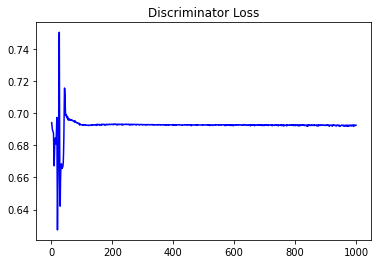

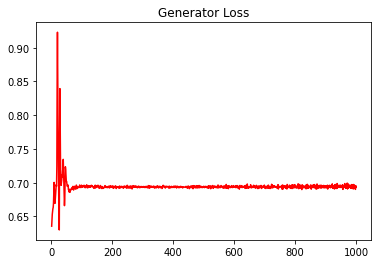

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11327164720215728


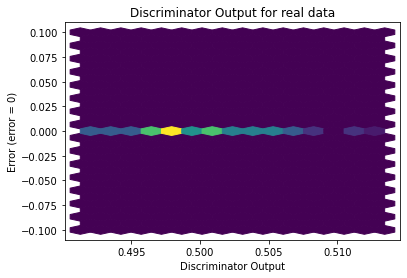

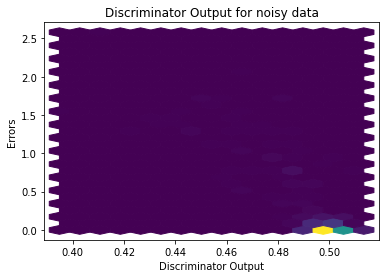

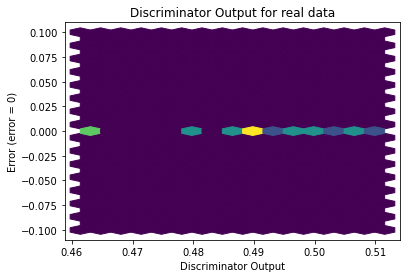

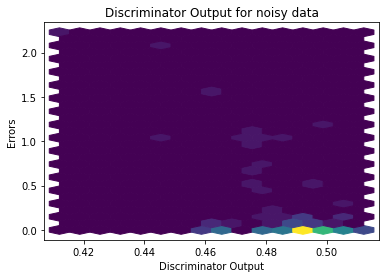

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


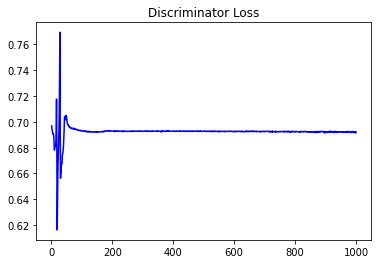

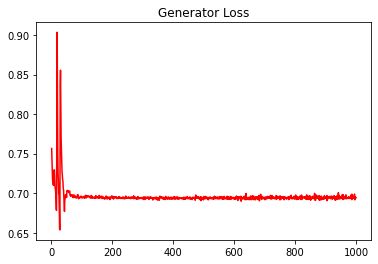

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08517219809487385


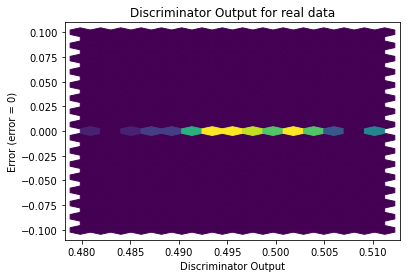

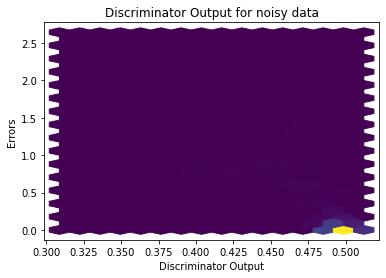

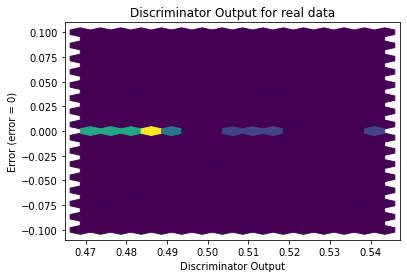

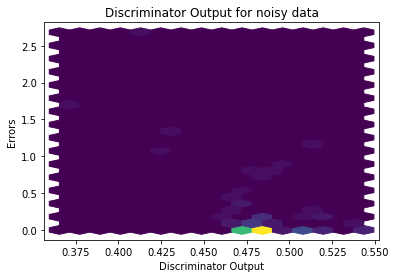

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6652]], requires_grad=True)
